In [1]:
import sys
import os
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import itertools
import qinfer as qi
from lfig import LatexFigure

sys.path.append("/home/bf16951/QMD")
import qmla

%matplotlib inline

In [2]:
runs_and_instances = {
    "14_43" : [1,2,3,4],
    "14_45" :[1,2,3,8],
    "14_46" : [1,2,3,4], 
    "14_48" : [1,2,3,4]
}

In [3]:
experiments = sorted(range(1001))
probe_names = {
    "separable_probe_dict" : r"$| r \rangle$", 
    "tomographic_basis" : r"$|t\rangle$",
    "zero_state_probes" : r"$|0\rangle$",
    "plus_probes_dict" : r"$|+\rangle$"
}
name_descriptions = {
#     "pauliSet_1_z_d1" : r'$\sigma_{(1)}^{z}$',
#     "pauliSet_1_x_d1+pauliSet_1_y_d1+pauliSet_1_z_d1" : '$\sigma_{(1)}^{xyz}$', 
#     "pauliSet_1J3_zJz_d5+pauliSet_1J4_zJz_d5+pauliSet_1J5_zJz_d5+pauliSet_2J4_zJz_d5+pauliSet_2J5_zJz_d5+pauliSet_3J4_zJz_d5+pauliSet_3J5_zJz_d5" : "Ising", 
#     "pauliSet_1J2_zJz_d4+pauliSet_1J3_zJz_d4+pauliSet_2J3_xJx_d4+pauliSet_2J3_zJz_d4+pauliSet_2J4_xJx_d4+pauliSet_3J4_zJz_d4" : "Heisenberg"
    "pauliSet_1_z_d1" : r'$\hat{H}_1$',
    "pauliSet_1_x_d1+pauliSet_1_y_d1+pauliSet_1_z_d1" :  r'$\hat{H}_2$', 
    "pauliSet_1J3_zJz_d5+pauliSet_1J4_zJz_d5+pauliSet_1J5_zJz_d5+pauliSet_2J4_zJz_d5+pauliSet_2J5_zJz_d5+pauliSet_3J4_zJz_d5+pauliSet_3J5_zJz_d5" : r'$\hat{H}_3$',  
    "pauliSet_1J2_zJz_d4+pauliSet_1J3_zJz_d4+pauliSet_2J3_xJx_d4+pauliSet_2J3_zJz_d4+pauliSet_2J4_xJx_d4+pauliSet_3J4_zJz_d4" : r'$\hat{H}_4$', 
}

In [4]:

volumes = pd.DataFrame()

for run_dir in runs_and_instances:
    run_path = "Nov_27/{}".format(run_dir)
    
    for instance in runs_and_instances[run_dir]:
    
        results = qmla.load_results(
            results_folder = "/home/bf16951/thesis/qmla_run_data",
            results_time = run_path,
            instance_id = instance
        )
        q = results['qmla_instance']
        model = q.get_model_storage_instance_by_id(1)
        
        this_models_volumes = pd.DataFrame(
            np.array([
                [
                    probe_names[q.exploration_class.system_probes_generation_subroutine.__name__], 
                    q.exploration_class.latex_name(model.name), 
                    model.name,  
                    name_descriptions[model.name], 
                    e, 
                    float(model.volume_by_epoch[e])
                ] for e in experiments
            ]),
            columns = ['probe', 'model', 'raw_name', "description",  'experiment', 'volume']
        )
    
        
        volumes = volumes.append(this_models_volumes, ignore_index=True)
volumes.experiment = volumes.experiment.astype(float)
volumes.volume = volumes.volume.astype(float)
sorted_probes = ['$|0\\rangle$', '$|+\\rangle$', '$|t\\rangle$', '$| r \\rangle$']

In [5]:
len(volumes)

16016

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


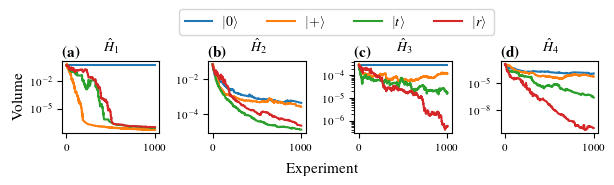

In [105]:
lf = LatexFigure(
    fraction=1, 
#     auto_gridspec=4,
    gridspec_params = {'wspace' : 0.5},
    gridspec_layout=(1,4)
)

for desc in volumes.description.unique():
    ax = lf.new_axis()
    
    model_name = volumes[volumes.description == desc].model.unique()[0]
    data = volumes[volumes.description == desc]

    for probe in sorted_probes:
        these_volumes = data[
            data.probe == probe
        ].volume.values
  
        ax.plot(
            experiments, 
            these_volumes,
            label = probe
        )

    if ax.grid_position == (0,1):
        ax.legend(
            ncol=4,
            bbox_to_anchor=(3, 1.8)
        )
    
    ax.semilogy()

#     if ax.row == 0:
#         ax.set_xlabel("")
#         ax.set_xticks([])
#     else:
#         ax.set_xlabel("Experiment")
        
    if ax.col != 0:
        ax.set_ylabel("")
    else:
        ax.set_ylabel("Volume")
        
#     ax.set_title(model_name)
    ax.set_title(desc)
    
lf.fig.text(0.5, -0.3, "Experiment", ha='center')
lf.save("/home/bf16951/thesis/qmla_run_data/Nov_27/training_probes.pdf")


In [103]:
data.probe.unique()

array(['$|+\\rangle$', '$|t\\rangle$', '$|0\\rangle$', '$| r \\rangle$'],
      dtype=object)

In [226]:
probe_types = {
    r"$| r \rangle$" : "14_48", 
    r"$|t\rangle$" : "14_46", 
    r"$|0\rangle$" : "14_45",
    r"$|+\rangle$" : "14_43"
}
probe_names = {
    r"$| r \rangle$" : "random_probes", 
    r"$|t\rangle$" : "tomographic_probes", 
    r"$|0\rangle$" : "zero_probes",
    r"$|+\rangle$" : "plus_probes"   
}
probe_colours = {
    r"$| r \rangle$" : "red", 
    r"$|t\rangle$" : "green", 
    r"$|0\rangle$" : "blue",
    r"$|+\rangle$" : "orange"       
}

In [235]:
probes_to_plot = list(probe_types.keys())

for ptype in probes_to_plot:
    run_path = "Nov_27/{}".format(probe_types[ptype])
    results = qmla.load_results(
        results_folder = "/home/bf16951/thesis/qmla_run_data",
        results_time = run_path,
        instance_id=1
    )
    q = results['qmla_instance']
    probe_dict = q.probes_system

    save_path = os.path.join("/home/bf16951/thesis/qmla_run_data/Nov_27/{}.pdf".format(
        probe_names[ptype])
    )
    
    fig, ax = plt.subplots(
        figsize=(5, 5), 
        subplot_kw=dict(projection='3d')
    )

    ax.axis('square') # to get a nice circular plot

    # isolate 1 qubit probes
    probe_ids = [t for t in list(probe_dict.keys()) if t[1] == 1]
    b1 = qutip.Bloch(
        fig=fig, 
        axes=ax,
    )
    colour = probe_colours[ptype]
    b1.vector_color = [colour]

    for pid in probe_ids:
        state = probe_dict[pid]
        a = state[0]
        b = state[1]
        A = a * qt.basis(2, 0)
        B = b * qt.basis(2, 1)
        vec = (A + B)
        b1.add_states(vec)
    
    ax.set_title(ptype)

    # You can anything else you want to the axis as well!
    ax.annotate(
        ptype, 
        xy=(0.0, 0.9), 
        xytext=(0, 0.7), 
        xycoords='axes fraction',
        fontsize=75, 
        color=colour, 
        ha='center',
    )
    
    b1.save(save_path)
#     b1.show()